# ANN


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

# Importing libraries

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [2]:
#reading the data
data=pd.read_csv("E:/data sets/cancer data/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#deleting unwanted columns
drop_cols=["id","Unnamed: 32"]
data.drop(drop_cols,axis=1,inplace=True)

In [5]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
#checking the null values 
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
#and converting M to 1 and B to 0 
data['diagnosis']=[1 if x=='M' else 0 for x in data['diagnosis']]

In [8]:
#checking the distribution of the target variable
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [9]:
#separating the dependent and independent features
y=data.diagnosis
X=data
X.drop("diagnosis",axis=1,inplace=True)

In [10]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Spliting the data

In [11]:
#spliting the data into train and test
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=123)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [12]:
#standardizing the data
std=StandardScaler()
std.fit(train_X)
train_X=pd.DataFrame(std.transform(train_X),index=train_X.index)
test_X=pd.DataFrame(std.transform(test_X),index=test_X.index)

In [13]:
train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
559,-0.754501,1.016591,-0.731287,-0.732655,-0.244628,-0.046204,0.276113,-0.209613,-1.463648,0.393141,...,-0.786560,1.835601,-0.748038,-0.715894,-0.048296,0.013325,0.464941,-0.272555,-1.224122,0.246375
295,-0.107318,-1.377551,-0.167357,-0.212302,-0.290236,-0.806690,-0.982285,-0.780715,-0.758709,-0.498156,...,-0.330400,-1.399872,-0.391399,-0.384622,-0.624296,-0.968536,-1.127291,-0.871529,-0.081993,-0.899752
264,0.872048,0.598852,0.813064,0.791235,0.092006,-0.277838,0.018477,0.422567,0.191577,-0.947868,...,1.108900,0.583315,0.998261,0.988855,1.121705,0.047299,0.591565,1.311903,0.549310,-0.440828
125,-0.084408,-0.492662,-0.151531,-0.194880,-0.589225,-0.822895,-0.937614,-0.983264,-0.682686,-0.527956,...,-0.159600,-0.336308,-0.207531,-0.269767,-0.682796,-0.779638,-0.913008,-0.980094,-0.819317,-0.670290
280,1.436186,1.616250,1.421142,1.400153,0.435156,0.777386,1.288387,1.241373,0.312522,-0.080953,...,1.554646,1.634084,1.577161,1.499322,2.129706,0.912967,1.503354,1.137701,0.616777,0.830675


# Building the Neural Network

In [14]:
#importing the keras and other libraries 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers,optimizers
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

Using TensorFlow backend.


In [15]:
#building the neural network...
#Defining the Optimizer
adam=keras.optimizers.adam(lr=0.001,decay=0.0005)

## Just a way to define neural nets. There are two ways sequential and functional
## Sequential model lets you add neural net layers one after another by calling function
model=Sequential()

## Adding layers sequentially one by one...
## Notice our data has 30 input columns which goes into as the "input_shape" parameter
model.add(Dense(64,input_shape=(30,)))

model.add(Dense(32,init="uniform",activation="relu"))

model.add(Dense(8,init="uniform",activation="relu"))

## Notice the use of l2 regularizer
model.add(Dense(1,activation="sigmoid",kernel_regularizer=regularizers.l2()))

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

#compiling our model and defining the loss function
model.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])

#training the neural nets
history=model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=200,batch_size=50,callbacks=[earlystopper,reduce_lr])

Train on 398 samples, validate on 171 samples
Epoch 1/200
398/398 [==============================] - 0s 574us/step - loss: 0.6859 - accuracy: 0.8719 - val_loss: 0.6481 - val_accuracy: 0.9591
Epoch 2/200
398/398 [==============================] - 0s 25us/step - loss: 0.6200 - accuracy: 0.9171 - val_loss: 0.5534 - val_accuracy: 0.9591
Epoch 3/200
398/398 [==============================] - 0s 33us/step - loss: 0.5134 - accuracy: 0.9146 - val_loss: 0.4173 - val_accuracy: 0.9591
Epoch 4/200
398/398 [==============================] - 0s 33us/step - loss: 0.3866 - accuracy: 0.9171 - val_loss: 0.2774 - val_accuracy: 0.9591
Epoch 5/200
398/398 [==============================] - 0s 30us/step - loss: 0.2739 - accuracy: 0.9221 - val_loss: 0.1873 - val_accuracy: 0.9708
Epoch 6/200
398/398 [==============================] - 0s 30us/step - loss: 0.2008 - accuracy: 0.9347 - val_loss: 0.1406 - val_accuracy: 0.9825
Epoch 7/200
398/398 [==============================] - 0s 25us/step - loss: 0.1565 - accu

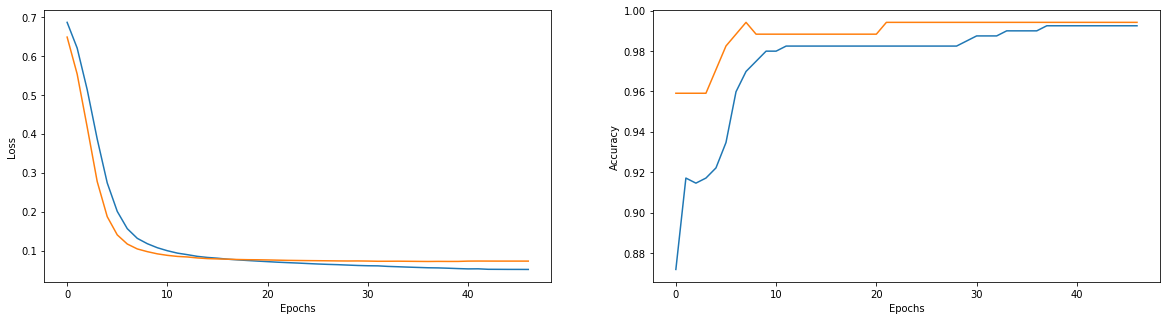

In [16]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)